# Machine Learning (CS60050)<br> Assignment 2 - K Means Clustering

## Topic: Pima Indians Diabetes Database

#### By: (Group 32)<br>Krinal Patel (21CS60R39)<br>Sarvesh Gupta (21CS60R53)

## Deatils of Dataset:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. The datasets consists of several medical predictor variables and one target variable.

#### Attributes of Dataset:
This data set has 9 columns: <br>
1. Pregnancies : Number of times pregnant <br>
2. Glucose : Plasma Glucose concentration <br>
3. BloodPressure : Diastolic (lower limit) Blood Pressure (mm Hg)<br>
4. SkinThickness : Triceps skin fold thickness (mm)<br>
5. Insulin : 2-Hour serum insulin (mu U/ml) <br>
6. BMI : Body Mass Index (weight in kg/(height in m)^2)<br>
7. DiabetesPedigreeFunction : A function which scores likelihood of diabetes based on family history <br>
8. Age : Age in years <br>
9. Outcome : Final Result (0 means Non-Diabatic, 1 means Diabatic) 

#### Link of Dataset:
Pima Indians Diabetes Database: https://www.kaggle.com/uciml/pima-indians-diabetes-database

#### Importing all the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rn

from sklearn.metrics.cluster import adjusted_rand_score,adjusted_mutual_info_score,homogeneity_score,normalized_mutual_info_score
from sklearn.metrics import silhouette_score,silhouette_samples

import seaborn as sns

#### Reading the dataset:

In [2]:
df=pd.read_csv('PIDD.csv')

## Data Understanding

#### Top 5 rows of dataset

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Deatils about Dataset

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Column Names

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Datatypes of all the Columns

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Shape of Dataset

In [7]:
df.shape

(768, 9)

Rows: 768<br>
Column: 9

## Graphs used for Data Preparation

#### Histogram

In [8]:
def histogram(dataset):
    dataset.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
    plt.tight_layout(rect=(0, 0, 2, 2))   

#### Heat Map

In [9]:
def heatmap(dataset):
    plt.figure(figsize=(14,12))
    p=sns.heatmap(dataset.corr(), annot=True,cmap ='YlGnBu') 

#### Pair Plot

In [10]:
def plot_cluster(dataset,labels,centroids,x,y):
    f1 = (np.where(labels==0))[0]
    f2= (np.where(labels==1))[0]
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(dataset[x].iloc[f1] , dataset[y].iloc[f1] , color = 'red',label='class 0')
    plt.scatter(dataset[x].iloc[f2] , dataset[y].iloc[f2] , color = 'blue',label='class 1')
    plt.legend(loc="upper left")
    k1=dataset.columns.get_loc(x)
    k2=dataset.columns.get_loc(y)
    plt.scatter(centroids[:,k1],centroids[:,k2],color='black')
    plt.show()

## Data Preparation

#### Display Number of NULL cells in each column

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Data Distribution of each column

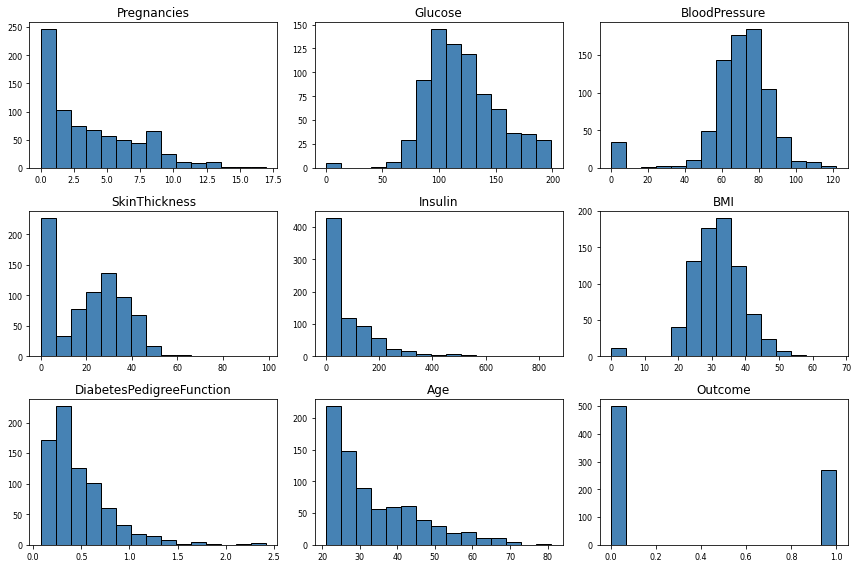

In [12]:
histogram(df)

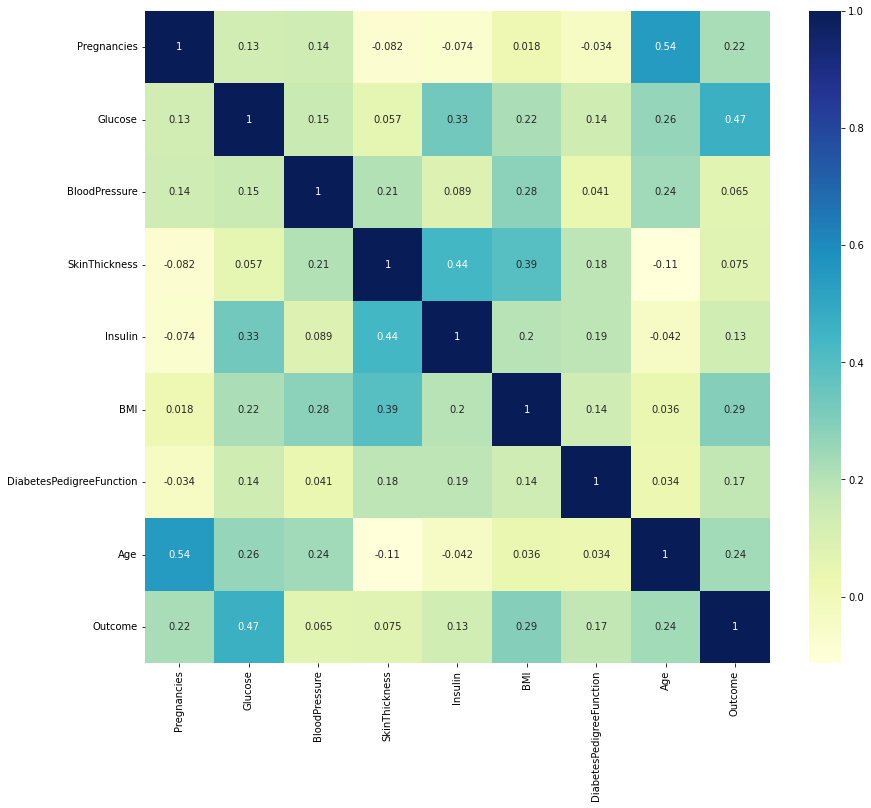

In [13]:
heatmap(df)

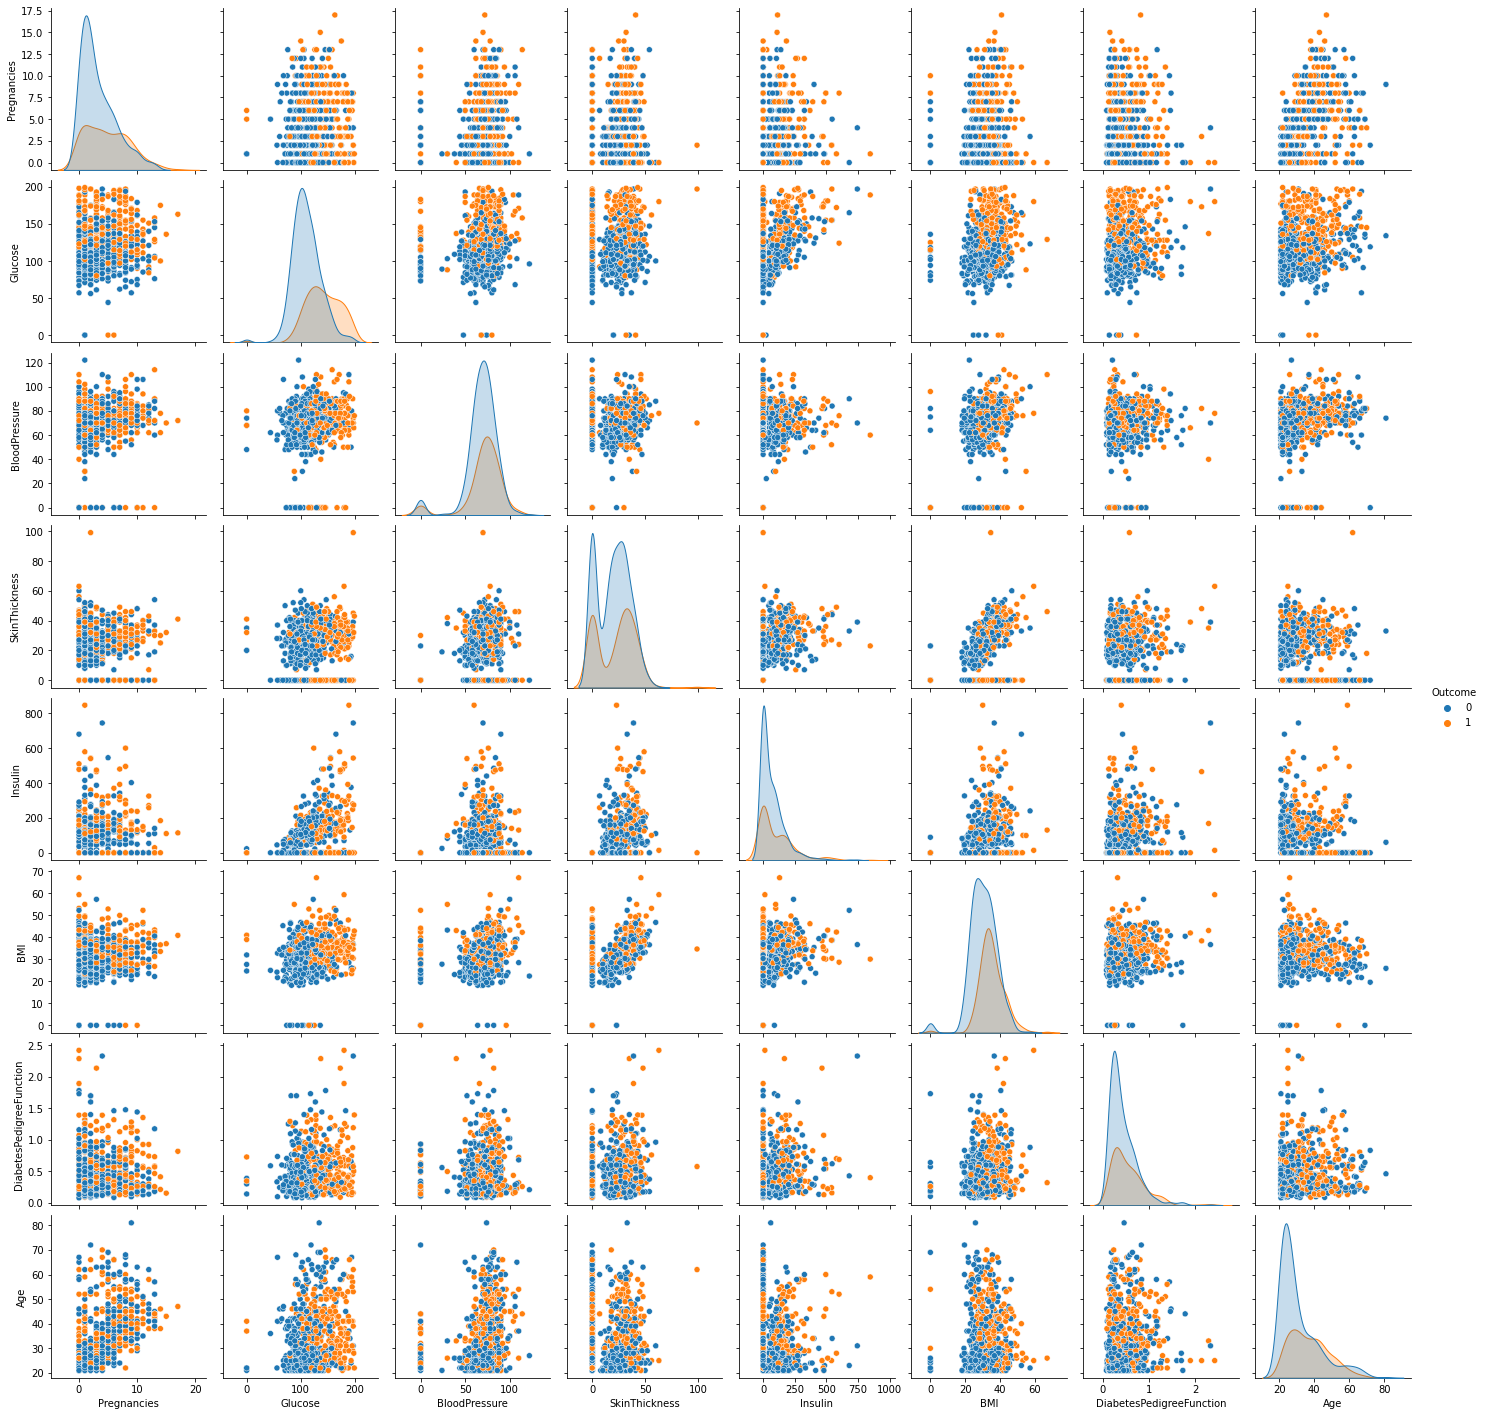

In [14]:
sns.pairplot(df,hue = 'Outcome')

Now after seeing the following analysis, the question arises that, can minimum value of following columns be 0 (is it practically possible). <br><br>
For the following columns zero value is invalid:<br>
1. Glucose <br>
2. BloodPressure <br>
3. SkinThickness <br>
4. Insulin <br>
5. BMI


And for others it is possible: <br>
1. Pregnancies <br>
2. Outcome<br>

It is better to replace zero values of these columns with mean or median based on there individual distribution.

#### First We create a copy of dataset, so that we can later see the difference of output on both the datasets.

In [15]:
df_copy = df.copy(deep = True)

df_copy is the dataset on which we perform all changes and replace the 0 values with mean or median

In [16]:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

#### Display Number of NULL cells in each column

In [17]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

After observing the number of NULL values and corelation of the columns, with the output, we decided to drop some columns from the df_copy dataset, for better results.

Selected Feature should have atleast 0.20 correlation value with the output (as per heatmap), and having maximum not NULL values.

In [18]:
df_copy=df_copy[['Pregnancies','Glucose','BMI','Age','Outcome']]

#### Display Number of NULL cells in each column

In [19]:
df_copy.isnull().sum()

Pregnancies     0
Glucose         5
BMI            11
Age             0
Outcome         0
dtype: int64

#### Mean: We prefer mean over others in the case of when data of that column is not skewed.
#### Median: We prefer median over others when the data is skewed.

In [20]:
# Glucose is not skewed, therefore it is replaced with mean of the column
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True) 
# BMI is right skewed, therefore it replaced with median of the column
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

#### Display Number of NULL cells in each column

In [21]:
df_copy.isnull().sum()

Pregnancies    0
Glucose        0
BMI            0
Age            0
Outcome        0
dtype: int64

#### Data Distribution of each column

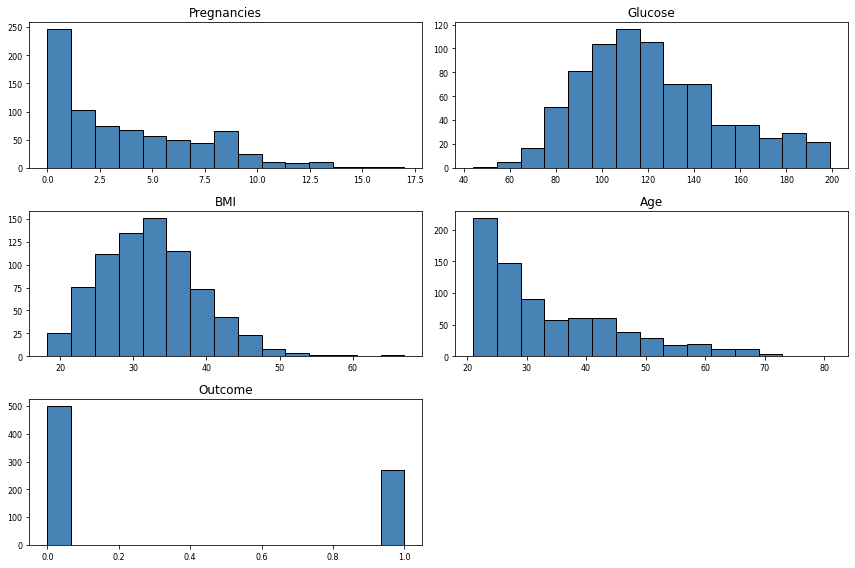

In [22]:
histogram(df_copy)

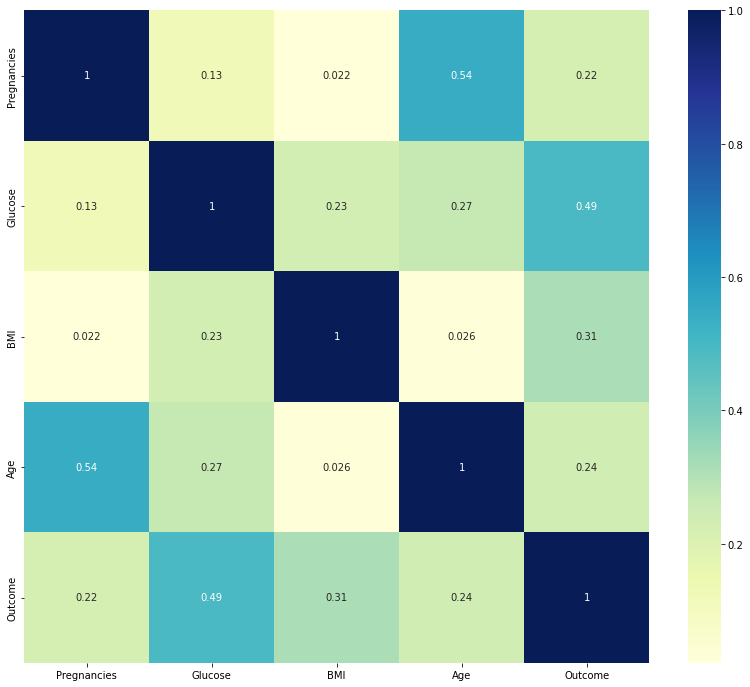

In [23]:
heatmap(df_copy)

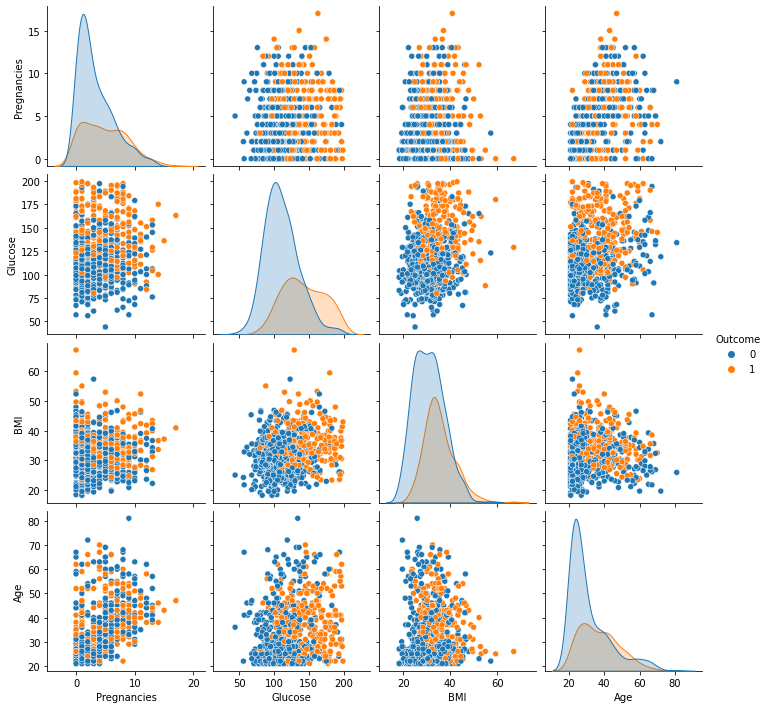

In [24]:
sns.pairplot(df_copy,hue = 'Outcome')

## Functions Used in the Code

In [25]:
def random_k(n,k,r_state=1):
    rn.seed(r_state)
    ids = rn.sample(range(0, n), k)
    return ids

In [26]:
def initial_centroid(dataset,k,state=1):
    n=dataset.shape[0]
    ids=random_k(n,k,r_state=state)
    centroids = [tuple(dataset[id]) for id in ids]
    return np.array(centroids)

In [27]:
def squared_distance_matrix(dataset,centroids):
    A = np.reshape(np.sum(dataset * dataset, axis=1), (dataset.shape[0], 1))
    B= np.reshape(np.sum(centroids * centroids, axis=1), (1, centroids.shape[0]))
    
    AB = dataset @ centroids.T
    C = -2 * AB + B + A
    return C

In [28]:
def assign_cluster(dataset,centroids):
    k = centroids.shape[0]
    distance_matrix = squared_distance_matrix(dataset, centroids)
    clusters = np.argmin(distance_matrix, axis=1)
  
    return clusters

In [29]:
def update_centroids(clusters,dataset,k):
    centroids = np.zeros((k, dataset.shape[1]))
    for i in range (k):
        centroids[i, :] = np.mean(dataset[clusters == i, :], axis=0)
    return centroids

## Task - 1

#### K-means Algorithm

In [30]:
def k_mean(dataset,k,seed=1,given_centroids=[]):
    centroids=given_centroids
    if len(centroids)==0:
        centroids=initial_centroid(dataset,k,state=seed)
    
    while True:
        clusters=assign_cluster(dataset,centroids)
        new_centroids=update_centroids(clusters,dataset,k)
        if (centroids==new_centroids).all():
            return clusters,centroids
        centroids=new_centroids

In [31]:
def ploter(dataset,k,state=1):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 4)
    
    labels,centroids=k_mean(np_df,k,seed=state)
    
    # Get silhouette samples
    silhouette_vals = silhouette_samples(dataset, labels,)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    temp_labels=(np.unique(labels))
    for i, cluster in enumerate(temp_labels):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    msg='Silhouette plot for k='+str(k)+' various clusters'
    ax1.set_title(msg, y=1.02);
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

#### Train Test Split (Training Data:Testing Data :: 80:20)

In [32]:
def train_test_split(x,y,seed=1):
    n=len(x)
    temp_list=np.array(range(0,n))
    
    np.random.seed(seed)
    np.random.shuffle(temp_list)
    k=n//5 
    ids=temp_list[:k]
    test_x=np.array([tuple(x[id]) for id in ids])
    test_y=np.array([y[id] for id in ids])
    train_x=np.delete(x,ids,axis=0)
    train_y=np.delete(y,ids,axis=0)
    return train_x,test_x,train_y,test_y

#### K-Means++ Algorithm

In [33]:
#kmean++ initialization: heuristic function: centroids should be as far as possible from each other
def k_mean_plus(dataset,k,r_state=21):
    rn.seed(r_state)
    
    c0 = rn.randint(0,dataset.shape[0]-1)
    centroids=[]
    centroids.append(tuple(dataset[c0]))
    dataset=np.delete(dataset,c0,axis=0)
    
    for i in range(0,k-1):        
        distances=np.min(squared_distance_matrix(dataset,np.array(centroids)),axis=1)
        normalized_distances = distances / distances.sum()
        normalized_distance=np.sort(normalized_distances)
        normalized_distance=normalized_distances
        rn.seed(i)
        dice_roll=rn.random()
        min_over_roll = normalized_distance[normalized_distance.cumsum() >= dice_roll].min()  
        idx = np.where(normalized_distances==min_over_roll)     
        centroids.append(dataset[idx[0][0]])
        dataset=np.delete(dataset,idx[0][0],axis=0)
    
    return np.array(centroids)

## For the Original Dataset:

#### Splitting Dataset into 2 parts (train and outcome)

In [34]:
train_df=df.drop('Outcome',axis='columns',inplace=False)
train_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [35]:
np_df=df.to_numpy()
np_true=df['Outcome'].to_numpy()

## Task - 2

#### Clustering Performance 

In [36]:
pos=0
neg=0
labels,centroids=k_mean(np_df,2,seed=42)
for i in range(np_df.shape[0]):
    if labels[i]==np_true[i]:
        pos=pos+1

print("Performance Measures for K=2")
print("Accuracy using Ground Truth: ",round(pos/np_df.shape[0],3)) 
print("Performance measure using ARI: ",adjusted_rand_score(labels,np_true))
print("Performance measure using Silhouette_Score: ",silhouette_score(np_df, labels, metric='euclidean'))

Performance Measures for K=2
Accuracy using Ground Truth:  0.66
Performance measure using ARI:  0.07438695547529087
Performance measure using Silhouette_Score:  0.5687788342658853


#### List of Centroids and the Graph representing the Clusters

Actual cluster Based on True labels
[[  3.298      109.98        68.184       19.664       68.792
   30.3042       0.429734    31.19         0.        ]
 [  4.86567164 141.25746269  70.82462687  22.1641791  100.3358209
   35.14253731   0.5505      37.06716418   1.        ]]


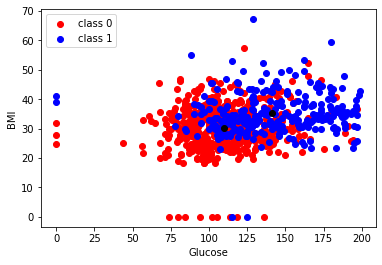


Predected cluster using Kmean
[[  3.88391376 115.26699834  68.09784411  17.6185738   32.21227197
   31.17363184   0.43757048  33.11442786   0.30182421]
 [  3.7030303  141.46060606  72.78787879  31.2        253.70909091
   34.98545455   0.59724848  33.7030303    0.52121212]]


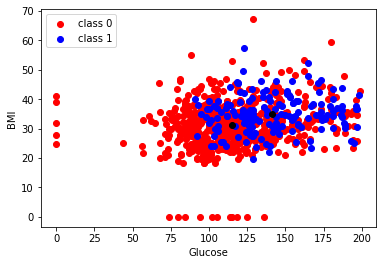

In [37]:
'''
Reason for choosing Glucose and BMI for ploting:
Glucose and BMI have the higest and second highest co-relation value as show in Heat Map. 
'''
centroids1=update_centroids(np_true,np_df,2)
print("Actual cluster Based on True labels")
print(centroids1)
plot_cluster(df,np_true,centroids1,'Glucose','BMI') #Actual cluster
print()
print("Predected cluster using Kmean")
print(centroids)
plot_cluster(df,labels,centroids,'Glucose','BMI') #Kmean cluster

#### Clustering Performance for different values of K

In [38]:
values_se=[]
values_score=[]
x=[]
for i in range(2,16):
    labels,centroids=k_mean(np_df,i,seed=42)
    ari1=adjusted_rand_score(labels,np_true)
    score = silhouette_score(np_df, labels, metric='euclidean')
    print("No of cluster: ",i," ARI:",round(ari1,4)," Silhouette_Score:",round(score,4))
    x.append(i)
    values_score.append(score)

No of cluster:  2  ARI: 0.0744  Silhouette_Score: 0.5688
No of cluster:  3  ARI: 0.0452  Silhouette_Score: 0.5104
No of cluster:  4  ARI: 0.0277  Silhouette_Score: 0.4251
No of cluster:  5  ARI: 0.0305  Silhouette_Score: 0.3907
No of cluster:  6  ARI: 0.0686  Silhouette_Score: 0.3335
No of cluster:  7  ARI: 0.0576  Silhouette_Score: 0.3105
No of cluster:  8  ARI: 0.0549  Silhouette_Score: 0.2847
No of cluster:  9  ARI: 0.0537  Silhouette_Score: 0.3167
No of cluster:  10  ARI: 0.0437  Silhouette_Score: 0.2725
No of cluster:  11  ARI: 0.0378  Silhouette_Score: 0.2578
No of cluster:  12  ARI: 0.0328  Silhouette_Score: 0.2388
No of cluster:  13  ARI: 0.0273  Silhouette_Score: 0.2485
No of cluster:  14  ARI: 0.031  Silhouette_Score: 0.2616
No of cluster:  15  ARI: 0.0319  Silhouette_Score: 0.2598


## Task - 3

#### Graph of Value of K vs Silhouette Score

Text(0, 0.5, 'Silhouette Score')

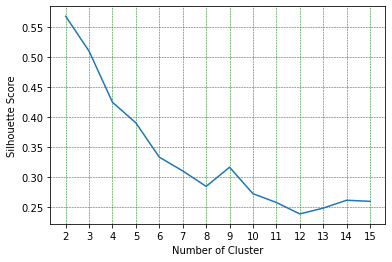

In [39]:
#silhoutte score
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x,values_score)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("Number of Cluster")
plt.ylabel("Silhouette Score")

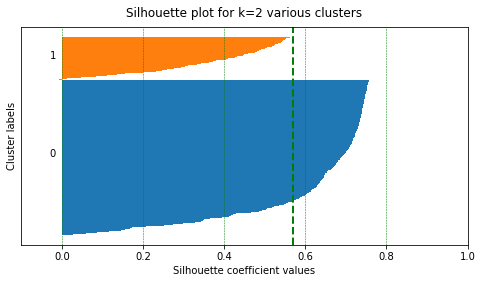

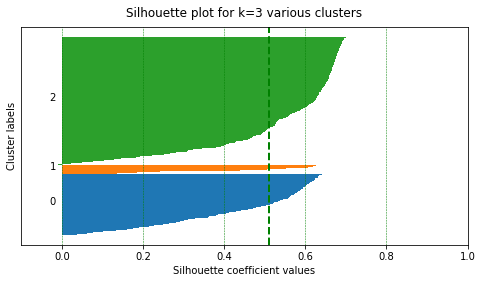

In [40]:
for i in range(2,4):
    ploter(np_df,i,state=42)

## Task - 4

#### Test - A with Random Initialization

In [41]:
no_of_clusters=2
ari_array1=[]
for i in range(1,51):
    ids=random_k(np_df.shape[0],no_of_clusters,r_state=i)
   
    centroids=np.array([tuple(np_df[id]) for id in ids])
    remaining_df=np.delete(np_df,ids,axis=0)
    remaining_truth=np.delete(np_true,ids,axis=0)
    avg=0
    for j in range(1,51):
        train_x,test_x,train_y,test_y=train_test_split(remaining_df,remaining_truth,seed=j)
        np.append(train_x,np.array([np_df[id] for id in ids]),axis=0)
        np.append(train_y,np.array([np_true[id] for id in ids]),axis=0)
        labels,centroids=k_mean(train_x,no_of_clusters,given_centroids=centroids)
        clusters=assign_cluster(test_x,centroids)
        avg=avg+adjusted_rand_score(clusters,test_y)
        
    ari_array1.append(round(avg/50,3))
    print("Avg value for iteration ",i,":",round(avg/50,3))

Avg value for iteration  1 : 0.073
Avg value for iteration  2 : 0.074
Avg value for iteration  3 : 0.075
Avg value for iteration  4 : 0.077
Avg value for iteration  5 : 0.078
Avg value for iteration  6 : 0.071
Avg value for iteration  7 : 0.078
Avg value for iteration  8 : 0.08
Avg value for iteration  9 : 0.072
Avg value for iteration  10 : 0.069
Avg value for iteration  11 : 0.068
Avg value for iteration  12 : 0.076
Avg value for iteration  13 : 0.076
Avg value for iteration  14 : 0.08
Avg value for iteration  15 : 0.069
Avg value for iteration  16 : 0.072
Avg value for iteration  17 : 0.068
Avg value for iteration  18 : 0.074
Avg value for iteration  19 : 0.073
Avg value for iteration  20 : 0.082
Avg value for iteration  21 : 0.077
Avg value for iteration  22 : 0.076
Avg value for iteration  23 : 0.071
Avg value for iteration  24 : 0.074
Avg value for iteration  25 : 0.074
Avg value for iteration  26 : 0.084
Avg value for iteration  27 : 0.075
Avg value for iteration  28 : 0.081
Avg

#### Test - A with Heuristic for Initialization (K-means++)

In [42]:
no_of_clusters=2
ari_array2=[]
 
for i in range(1,51):
     
    centroids=k_mean_plus(np_df,no_of_clusters,r_state=i)

    ids=[]
    for j in range(2):

        x=np.where(np.all(np_df==centroids[j],axis=1))
        ids.append(x[0][0])
    remaining_df=np.delete(np_df,ids,axis=0)
    remaining_truth=np.delete(np_true,ids,axis=0)
    avg=0
    for j in range(1,51):
        train_x,test_x,train_y,test_y=train_test_split(remaining_df,remaining_truth,seed=j)
        np.append(train_x,np.array([np_df[id] for id in ids]),axis=0)
        np.append(train_y,np.array([np_true[id] for id in ids]),axis=0)
        labels,centroids=k_mean(train_x,no_of_clusters,seed=42,given_centroids=centroids)
        clusters=assign_cluster(test_x,centroids)
        avg=avg+adjusted_rand_score(clusters,test_y)
    avgg=round(avg/50,3)
    ari_array2.append(avgg)
    print("Avg value for iteration ",i,":",round(avg/50,3))

Avg value for iteration  1 : 0.076
Avg value for iteration  2 : 0.074
Avg value for iteration  3 : 0.081
Avg value for iteration  4 : 0.08
Avg value for iteration  5 : 0.08
Avg value for iteration  6 : 0.079
Avg value for iteration  7 : 0.077
Avg value for iteration  8 : 0.082
Avg value for iteration  9 : 0.071
Avg value for iteration  10 : 0.079
Avg value for iteration  11 : 0.072
Avg value for iteration  12 : 0.073
Avg value for iteration  13 : 0.081
Avg value for iteration  14 : 0.079
Avg value for iteration  15 : 0.085
Avg value for iteration  16 : 0.075
Avg value for iteration  17 : 0.075
Avg value for iteration  18 : 0.084
Avg value for iteration  19 : 0.079
Avg value for iteration  20 : 0.078
Avg value for iteration  21 : 0.08
Avg value for iteration  22 : 0.079
Avg value for iteration  23 : 0.077
Avg value for iteration  24 : 0.076
Avg value for iteration  25 : 0.077
Avg value for iteration  26 : 0.081
Avg value for iteration  27 : 0.078
Avg value for iteration  28 : 0.083
Avg 

#### Graph Comparing ARI values for Random and K-Means++ Initialization 

Text(0, 0.5, 'ARI Score')

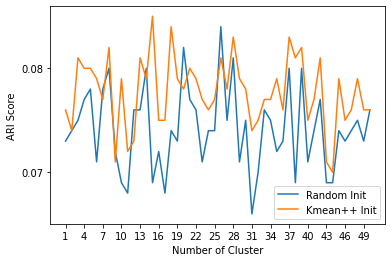

In [43]:
x1=list(range(1,51))
plt.xticks(np.arange(min(x1), max(x1)+1, 3.0))
plt.yticks(np.arange(0.07, 0.9, 0.01))

plt.plot(x1,ari_array1,label='Random Init')
plt.plot(x1,ari_array2,label='Kmean++ Init')
plt.legend(loc="lower right")

plt.xlabel("Number of Cluster")
plt.ylabel("ARI Score")

## For Modified Dataset (With Columns: [Pregnancies,Glucose,BMI,Age,Outcome])

#### Splitting Dataset into 2 parts (train and outcome)

In [44]:
train_df1=df_copy.drop('Outcome',axis='columns',inplace=False)
train_df1.describe()

,Pregnancies,Glucose,BMI,Age
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,32.455208,33.240885
std,3.369578,30.435949,6.875177,11.760232
min,0.000000,44.000000,18.200000,21.000000
25%,1.000000,99.750000,27.500000,24.000000
50%,3.000000,117.000000,32.300000,29.000000
75%,6.000000,140.250000,36.600000,41.000000
max,17.000000,199.000000,67.100000,81.000000


In [45]:
np_df1=df_copy.to_numpy()
np_true1=df_copy['Outcome'].to_numpy()

## Task - 2

#### Clustering Performance 

In [46]:
pos=0
neg=0
labels1,centroids=k_mean(np_df1,2,seed=22)
for i in range(np_df1.shape[0]):
    if labels1[i]==np_true1[i]:
        pos=pos+1
print("Performance Measures for K=2")
print("Accuracy using Ground Truth: ",round(pos/np_df1.shape[0],3)) 
print("Performance measure using ARI: ",adjusted_rand_score(labels1,np_true1))
print("Performance measure using Silhouette_Score: ",silhouette_score(np_df1, labels1, metric='euclidean'))

Performance Measures for K=2
Accuracy using Ground Truth:  0.737
Performance measure using ARI:  0.21456938548978738
Performance measure using Silhouette_Score:  0.4899305130082588


#### List of Centroids and the Graph representing the Clusters

Actual cluster Based on True labels
[[  3.298      110.71012058  30.8856      31.19         0.        ]
 [  4.86567164 142.16557286  35.38358209  37.06716418   1.        ]]


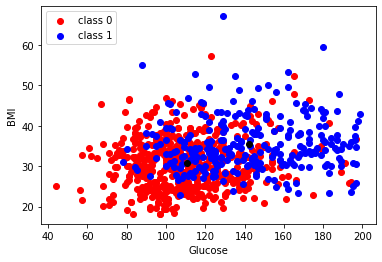


Predected cluster using Kmean
[[  3.48850575 104.51615673  31.52241379  30.87164751   0.21455939]
 [  4.60162602 158.12195122  34.43455285  38.26829268   0.63414634]]


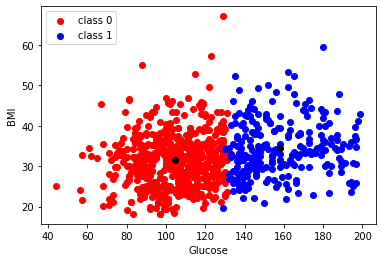

In [47]:
'''
Reason for choosing Glucose and BMI for ploting:
Glucose and BMI have the higest and second highest co-relation value as show in Heat Map. 
'''
centroids1=update_centroids(np_true1,np_df1,2)
print("Actual cluster Based on True labels")
print(centroids1)
plot_cluster(df_copy,np_true1,centroids1,'Glucose','BMI') #Actual cluster
print()
print("Predected cluster using Kmean")
print(centroids)
plot_cluster(df_copy,labels1,centroids,'Glucose','BMI') #Kmean cluster

#### Clustering Performance for different values of K

In [48]:
values_se1=[]
values_score1=[]
x1=[]
for i in range(2,16):
    labels,centroids=k_mean(np_df1,i,seed=42)
   
    ari1=adjusted_rand_score(labels,np_true1)
    score = silhouette_score(np_df1, labels, metric='euclidean')
    
    print("No of cluster:",i," ARI:",round(ari1,2)," Silhouette_Score: ",round(score,2))
    x1.append(i)
    
    values_score1.append(score)

No of cluster: 2  ARI: 0.21  Silhouette_Score:  0.49
No of cluster: 3  ARI: 0.16  Silhouette_Score:  0.38
No of cluster: 4  ARI: 0.12  Silhouette_Score:  0.32
No of cluster: 5  ARI: 0.12  Silhouette_Score:  0.33
No of cluster: 6  ARI: 0.12  Silhouette_Score:  0.34
No of cluster: 7  ARI: 0.11  Silhouette_Score:  0.33
No of cluster: 8  ARI: 0.08  Silhouette_Score:  0.31
No of cluster: 9  ARI: 0.07  Silhouette_Score:  0.29
No of cluster: 10  ARI: 0.06  Silhouette_Score:  0.27
No of cluster: 11  ARI: 0.06  Silhouette_Score:  0.26
No of cluster: 12  ARI: 0.05  Silhouette_Score:  0.26
No of cluster: 13  ARI: 0.05  Silhouette_Score:  0.26
No of cluster: 14  ARI: 0.04  Silhouette_Score:  0.27
No of cluster: 15  ARI: 0.04  Silhouette_Score:  0.27


## Task - 3

#### Graph of Value of K vs Silhouette Score

Text(0, 0.5, 'Silhouette Score')

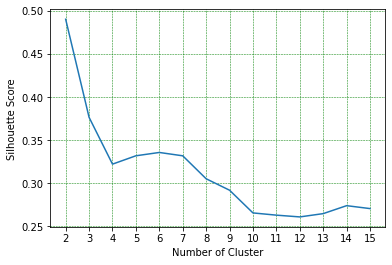

In [49]:
#silhoutte score
plt.xticks(np.arange(min(x1), max(x1)+1, 1.0))
plt.plot(x1,values_score1)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("Number of Cluster")
plt.ylabel("Silhouette Score")

## Task - 4

#### Test - A with Random Initialization

In [50]:
no_of_clusters=2
ari_array3=[]
for i in range(1,51):
    ids=random_k(np_df1.shape[0],no_of_clusters,r_state=i)
   
    centroids=np.array([tuple(np_df1[id]) for id in ids])
    remaining_df=np.delete(np_df1,ids,axis=0)
    remaining_truth=np.delete(np_true1,ids,axis=0)
    avg=0
    for j in range(1,51):
        train_x,test_x,train_y,test_y=train_test_split(remaining_df,remaining_truth,seed=j)
        np.append(train_x,np.array([np_df1[id] for id in ids]),axis=0)
        np.append(train_y,np.array([np_true1[id] for id in ids]),axis=0)
        labels,centroids=k_mean(train_x,no_of_clusters,given_centroids=centroids)
        clusters=assign_cluster(test_x,centroids)
        avg=avg+adjusted_rand_score(clusters,test_y)
        
    ari_array3.append(round(avg/50,3))
    print("Avg value for iteration ",i,":",round(avg/50,3))

Avg value for iteration  1 : 0.211
Avg value for iteration  2 : 0.221
Avg value for iteration  3 : 0.214
Avg value for iteration  4 : 0.222
Avg value for iteration  5 : 0.213
Avg value for iteration  6 : 0.209
Avg value for iteration  7 : 0.223
Avg value for iteration  8 : 0.226
Avg value for iteration  9 : 0.212
Avg value for iteration  10 : 0.203
Avg value for iteration  11 : 0.204
Avg value for iteration  12 : 0.214
Avg value for iteration  13 : 0.22
Avg value for iteration  14 : 0.22
Avg value for iteration  15 : 0.212
Avg value for iteration  16 : 0.209
Avg value for iteration  17 : 0.205
Avg value for iteration  18 : 0.22
Avg value for iteration  19 : 0.212
Avg value for iteration  20 : 0.218
Avg value for iteration  21 : 0.221
Avg value for iteration  22 : 0.224
Avg value for iteration  23 : 0.222
Avg value for iteration  24 : 0.211
Avg value for iteration  25 : 0.221
Avg value for iteration  26 : 0.215
Avg value for iteration  27 : 0.207
Avg value for iteration  28 : 0.212
Avg 

#### Test - A with Heuristic for Initialization (K-means++)

In [51]:
no_of_clusters=2
ari_array4=[]
 
for i in range(1,51):
    centroids=k_mean_plus(np_df1,no_of_clusters,r_state=i)
    ids=[]
    for j in range(2):
        x=np.where(np.all(np_df1==centroids[j],axis=1))
        ids.append(x[0][0])
    
    remaining_df=np.delete(np_df1,ids,axis=0)
    remaining_truth=np.delete(np_true1,ids,axis=0)
    avg=0
    for j in range(1,51):
        train_x,test_x,train_y,test_y=train_test_split(remaining_df,remaining_truth,seed=j)
        np.append(train_x,np.array([np_df1[id] for id in ids]),axis=0)
        np.append(train_y,np.array([np_true1[id] for id in ids]),axis=0)
        labels,centroids=k_mean(train_x,no_of_clusters,seed=42,given_centroids=centroids)
        clusters=assign_cluster(test_x,centroids)
        avg=avg+adjusted_rand_score(clusters,test_y)

    avgg=round(avg/50,3)
    ari_array4.append(avgg)
    print("Avg value for iteration ",i,":",round(avg/50,3))

Avg value for iteration  1 : 0.213
Avg value for iteration  2 : 0.213
Avg value for iteration  3 : 0.215
Avg value for iteration  4 : 0.214
Avg value for iteration  5 : 0.21
Avg value for iteration  6 : 0.211
Avg value for iteration  7 : 0.21
Avg value for iteration  8 : 0.212
Avg value for iteration  9 : 0.212
Avg value for iteration  10 : 0.211
Avg value for iteration  11 : 0.208
Avg value for iteration  12 : 0.208
Avg value for iteration  13 : 0.215
Avg value for iteration  14 : 0.219
Avg value for iteration  15 : 0.215
Avg value for iteration  16 : 0.211
Avg value for iteration  17 : 0.207
Avg value for iteration  18 : 0.217
Avg value for iteration  19 : 0.217
Avg value for iteration  20 : 0.215
Avg value for iteration  21 : 0.215
Avg value for iteration  22 : 0.22
Avg value for iteration  23 : 0.217
Avg value for iteration  24 : 0.218
Avg value for iteration  25 : 0.212
Avg value for iteration  26 : 0.212
Avg value for iteration  27 : 0.213
Avg value for iteration  28 : 0.215
Avg 

#### Graph Comparing ARI values for Random and K-Means++ Initialization 

Text(0, 0.5, 'ARI Score')

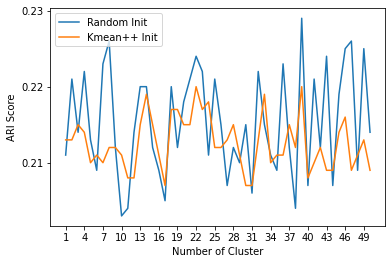

In [52]:
x1=list(range(1,51))
plt.xticks(np.arange(min(x1), max(x1)+1, 3.0))
plt.yticks(np.arange(0.1, 0.5, 0.01))
 
plt.plot(x1,ari_array3,label='Random Init')
plt.plot(x1,ari_array4,label='Kmean++ Init')
plt.legend(loc="upper left")

plt.xlabel("Number of Cluster")
plt.ylabel("ARI Score")